the test image is: /output/tensorflow_object_detection_api_demo/image/dog201.jpg
[[9.99912500e-01 1.03291578e-03 6.61613594e-04 5.50449768e-04
  4.61450109e-04 3.76877637e-04 3.09429422e-04 2.72153586e-04
  2.70628778e-04 2.65901268e-04 2.57453532e-04 2.50195822e-04
  2.34316045e-04 2.27314551e-04 2.24593809e-04 2.24492556e-04
  2.11466962e-04 2.05134391e-04 1.96225126e-04 1.94568856e-04
  1.86011574e-04 1.81768541e-04 1.75130146e-04 1.71342006e-04
  1.69880499e-04 1.66846745e-04 1.62278826e-04 1.59503194e-04
  1.58178402e-04 1.54854002e-04 1.53896020e-04 1.47872168e-04
  1.47294908e-04 1.46605656e-04 1.43368641e-04 1.40595235e-04
  1.40310498e-04 1.39808471e-04 1.38682008e-04 1.34204980e-04
  1.33180540e-04 1.28516607e-04 1.27902647e-04 1.27694511e-04
  1.27598963e-04 1.27432373e-04 1.20674260e-04 1.16559560e-04
  1.13007205e-04 1.12792004e-04 1.11396686e-04 1.10864181e-04
  1.10608642e-04 1.08671600e-04 1.06895815e-04 1.04866675e-04
  1.04844577e-04 1.04512779e-04 1.03946251e-04 1.03

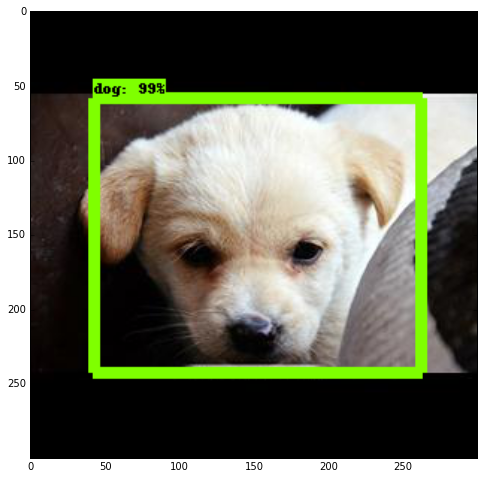

In [3]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

sys.path.append("/output/models/research/")
sys.path.append("/output/models/research/slim/")
sys.path.append("/output/models/research/object_detection/")
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from utils import label_map_util
from utils import visualization_utils as vis_util





PATH_TO_CKPT =  '/output/tensorflow_object_detection_api_demo/mymodel/frozen_inference_graph.pb'
PATH_TO_LABELS = '/output/tensorflow_object_detection_api_demo/label_map.pbtxt'
TEST_IMAGE ='/output/tensorflow_object_detection_api_demo/image/dog201.jpg'

NUM_CLASSES = 1

#Load a (frozen) Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
#Loading label map
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

#Helper code
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)



print ('the test image is:', TEST_IMAGE)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    #for image_path in TEST_IMAGE_PATHS:
    image = Image.open(TEST_IMAGE)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    scores = detection_graph.get_tensor_by_name('detection_scores:0')
    classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    # Actual detection.
    (boxes, scores, classes, num_detections) = sess.run(
        [boxes, scores, classes, num_detections],
        feed_dict={image_tensor: image_np_expanded})
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        line_thickness=8)

    print(scores)  
    print(classes)  
    print(category_index) 
   
    final_score = np.squeeze(scores)    
    count = 0
    for i in range(100):
        if scores is None or final_score[i] > 0.5:
            count = count + 1
    print ('the count of objects is: ', count)    

    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
    plt.show()

